In [ ]:
import numpy as np # linear algebra
import pandas as pd 
import re
import string
import nltk
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
from matplotlib import style
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
pyo.init_notebook_mode()
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA


In [ ]:
raw_data = pd.read_csv('./reddit_wsb.csv')
raw_data.head()

In [ ]:
raw_data.isnull().sum()

In [ ]:
title_data = raw_data[['title','timestamp']].copy()
body_data = raw_data[['body','timestamp']].copy()
body_data = body_data.dropna()
title_data = title_data.dropna()


title_data.title =title_data.title.str.lower()
body_data.body =body_data.body.str.lower()

#Remove handlers
title_data.title = title_data.title.apply(lambda x:re.sub('@[^\s]+','',x))
body_data.body   = body_data.body.apply(lambda x:re.sub('@[^\s]+','',x))

# Remove URLS
title_data.title = title_data.title.apply(lambda x:re.sub(r"http\S+", "", x))
body_data.body   = body_data.body.apply(lambda x:re.sub(r"http\S+", "", x))

# Remove all the special characters
title_data.title = title_data.title.apply(lambda x:' '.join(re.findall(r'\w+', x)))
body_data.body   = body_data.body.apply(lambda x:' '.join(re.findall(r'\w+', x)))

#remove all single characters
title_data.title = title_data.title.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
body_data.body   = body_data.body.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

# Substituting multiple spaces with single space
title_data.title = title_data.title.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
body_data.body   = body_data.body.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

#Remove Time From Timestamp
title_data.timestamp = pd.to_datetime(title_data.timestamp).dt.date
body_data.timestamp = pd.to_datetime(body_data.timestamp).dt.date

In [ ]:
print(title_data.count())
print(body_data.count())

In [ ]:
sid = SIA()
body_data['sentiments']           = body_data['body'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))
body_data['Positive Sentiment']   = body_data['sentiments'].apply(lambda x: x['pos']+1*(10**-6)) 
body_data['Neutral Sentiment']    = body_data['sentiments'].apply(lambda x: x['neu']+1*(10**-6))
body_data['Negative Sentiment']   = body_data['sentiments'].apply(lambda x: x['neg']+1*(10**-6))

body_data.drop(columns=['sentiments'],inplace=True)


title_data['sentiments']           = title_data['title'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))
title_data['Positive Sentiment']   = title_data['sentiments'].apply(lambda x: x['pos']+1*(10**-6)) 
title_data['Neutral Sentiment']    = title_data['sentiments'].apply(lambda x: x['neu']+1*(10**-6))
title_data['Negative Sentiment']   = title_data['sentiments'].apply(lambda x: x['neg']+1*(10**-6))

title_data.drop(columns=['sentiments'],inplace=True)

In [ ]:
title_data.head(10)

In [ ]:
body_data.head(10)

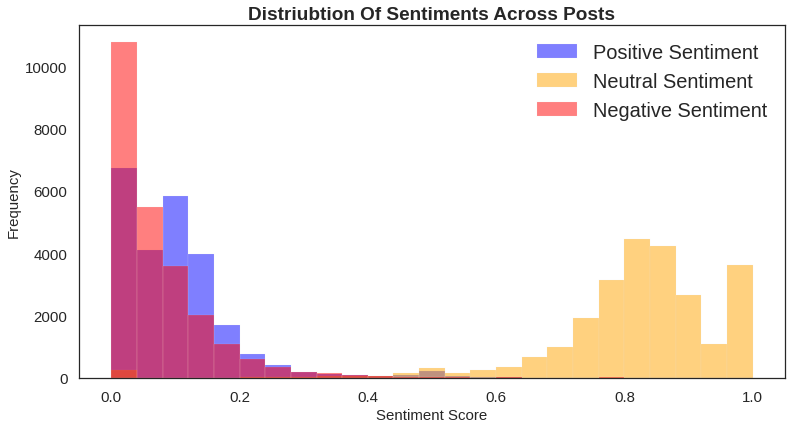

In [98]:
plt.figure(figsize=(10,5))
plt.title('Distriubtion Of Sentiments Across Posts',fontsize=19,fontweight='bold')
plt.xlabel('Sentiment Score',fontsize=15)
# change size of tick labels
plt.tick_params(labelsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.hist(body_data['Positive Sentiment'],bins=25,alpha=0.5,label='Positive Sentiment',color='blue')
plt.hist(body_data['Neutral Sentiment'],bins=25,alpha=0.5,label='Neutral Sentiment',color='orange')
plt.hist(body_data['Negative Sentiment'],bins=25,alpha=0.5,label='Negative Sentiment',color='red')
plt.legend()
plt.rcParams.update({'legend.fontsize': '20'})
plt.show()

# Apparently, The dominant sentiment among the Reddit post titles is by far neutral. Even more, there is a probability of 60% that a post title is classified to be completely neutral.